<a href="https://colab.research.google.com/github/Jency07/Deep-learning-lab/blob/main/20MAI0026_VGG16_Implemetation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ACTIVITY 2 - VGG16 Implementation***

## **1. Importing libraries**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import optimizers
from sklearn.metrics import confusion_matrix, classification_report

## **2. VGG16 Model Creation**

In [ ]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

weight_decay = 0.0005

model = Sequential()


model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=(32,32,3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Roll No: 20MAI0026
*****************************


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch

## **3. Compiling the model**

In [ ]:
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

## **4. Loading the dataset**

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 6s 0us/step


Roll No: 20MAI0026
*****************************




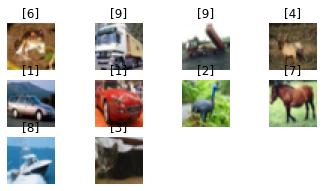

In [ ]:
# Displays 10 sample input images

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

for i in range(10):
# define subplot
  plt.subplot(4,4,i+1)
# plot raw pixel data
  plt.imshow(x_train[i])
  plt.title(str(y_train[i]))
  plt.axis('off')

# show the figure

plt.show()

## **5. Train Test Split**

In [ ]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1)

## **6. Feature Engineering**

In [ ]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
#Dataset details
print("Total number of images in database", x_train.shape[0]+x_val.shape[0]+x_test.shape[0])
print("Total number of images in training dataset", x_train.shape[0])
print("Total number of images in validation dataset", x_val.shape[0])
print("Total number of images in testing dataset", x_test.shape[0])
print("Size of image "+str(x_train.shape[1])+"*"+str(x_train.shape[2])+"*"+str(x_train.shape[3]))
print("Number of classes "+str(y_train.shape[1]))

Roll No: 20MAI0026
*****************************


Total number of images in database 60000
Total number of images in training dataset 45000
Total number of images in validation dataset 5000
Total number of images in testing dataset 10000
Size of image 32*32*3
Number of classes 10


In [ ]:
#Data Augmentation
datagen = ImageDataGenerator(
    
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

## **7. Training the model**

In [ ]:
def lr_scheduler(epoch):
            return learning_rate * (0.5 ** (epoch // lr_drop))
    
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

In [ ]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

batch_size = 128
maxepoches = 10


history = model.fit_generator(datagen.flow(x_train, y_train,
                                               batch_size=batch_size),
                                  
                                steps_per_epoch=x_train.shape[0] // batch_size,
                                epochs=maxepoches,
                                validation_data=(x_test, y_test),callbacks=[reduce_lr], verbose=1)

Roll No: 20MAI0026
*****************************


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


351/351 [==============================] - 59s 166ms/step - loss: 23.5708 - accuracy: 0.1554 - val_loss: 18.1932 - val_accuracy: 0.1412
Epoch 2/10
351/351 [==============================] - 56s 159ms/step - loss: 13.4528 - accuracy: 0.2594 - val_loss: 10.5321 - val_accuracy: 0.1038
Epoch 3/10
351/351 [==============================] - 56s 159ms/step - loss: 7.4294 - accuracy: 0.3712 - val_loss: 6.2498 - val_accuracy: 0.2065
Epoch 4/10
351/351 [==============================] - 56s 159ms/step - loss: 4.4629 - accuracy: 0.4467 - val_loss: 4.1636 - val_accuracy: 0.3080
Epoch 5/10
351/351 [==============================] - 56s 159ms/step - loss: 2.9657 - accuracy: 0.5168 - val_loss: 2.6674 - val_accuracy: 0.4944
Epoch 6/10
351/351 [==============================] - 56s 159ms/step - loss: 2.2319 - accuracy: 0.5636 - val_loss: 2.1834 - val_accuracy: 0.5296
Epoch 7/10
351/351 [==============================] - 56s 160ms/step - loss: 1.8791 - accuracy: 0.5923 - val_loss: 2.3182 - val_accuracy:

## **8. Testing the model**

In [ ]:
#Making prediction
y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Roll No: 20MAI0026
*****************************




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


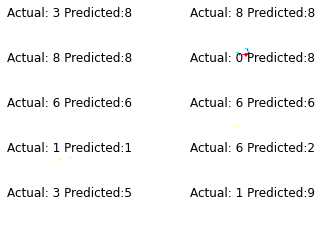

In [ ]:
#Display few test images and predictions

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

for i in range(10):
# define subplot
  plt.subplot(5,2,i+1)
# plot raw pixel data
  plt.imshow(x_test[i])
  plt.title("Actual: "+ str(y_true[i])+" Predicted:" + str(y_pred[i]))
  plt.axis('off')

# show the figure

plt.show()

## ***9. Evaluation Metrics***

### ***Confusion Matrix***

In [ ]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
confusion_matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

Roll No: 20MAI0026
*****************************


[[285   6 268   1   1   1   1   4 408  25]
 [ 27 760   7   0   0   3   1   1 152  49]
 [ 10   0 766  12  46  43  46  15  51  11]
 [ 16   6 174 282  43 221  76  30 111  41]
 [ 10   1 197  16 588  17  38  73  56   4]
 [  3   5 123  86  40 622  15  59  37  10]
 [  2  10 128  15  23  21 752   2  37  10]
 [ 32   0  86  26  34  43   2 726  27  24]
 [  0   5  11   2   1   1   2   0 973   5]
 [ 16  45   6   3   0   0   6   0 133 791]]


### ***Classification report***

In [ ]:
# Calculate Precision and Recall for each class

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

report = classification_report(y_true, y_pred)
print(report)

Roll No: 20MAI0026
*****************************


              precision    recall  f1-score   support

           0       0.71      0.28      0.41      1000
           1       0.91      0.76      0.83      1000
           2       0.43      0.77      0.55      1000
           3       0.64      0.28      0.39      1000
           4       0.76      0.59      0.66      1000
           5       0.64      0.62      0.63      1000
           6       0.80      0.75      0.78      1000
           7       0.80      0.73      0.76      1000
           8       0.49      0.97      0.65      1000
           9       0.82      0.79      0.80      1000

    accuracy                           0.65     10000
   macro avg       0.70      0.65      0.65     10000
weighted avg       0.70      0.65      0.65     10000



### ***Accuracy***

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Roll No: 20MAI0026
*****************************


Accuracy Score =  0.6545
